<a href="https://colab.research.google.com/github/VincentTatan/Analytics-Practicum/blob/master/ML_Toolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This removed warnings
import warnings  
warnings.filterwarnings('ignore')

import seaborn as sns # This is a data visualization library
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Composition Visualizations

In [0]:
# [Distribution] target variable pie slices
def create_pie(df,target_variable,figsize=(10,10)):
  print(df[target_variable].value_counts())
  fig, ax = plt.subplots(figsize=figsize)
  ax.pie(df[target_variable].value_counts().values, labels=df[target_variable].value_counts().index,autopct = '%1.2f%%',textprops={'fontsize': 20})
  
  ax.axis('equal')
  plt.title(target_variable)
  plt.show()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


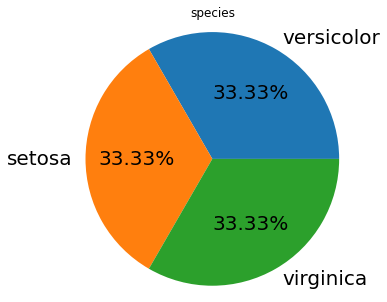

In [0]:
create_pie(iris,'species',figsize=(5,5))

In [0]:
# [Distribution] n continuous variable distributions

def draw_dist(df,features,subtitle,figsize=(20,3)):
  n_charts = len(features)
  fig, axes = plt.subplots(ncols=n_charts,figsize=figsize)
  fig.suptitle(subtitle, fontsize=16)
  for i in range(n_charts):
    feature = features[i-1]
    sns.distplot(df[feature],ax=axes[i-1])
    df[feature].describe()

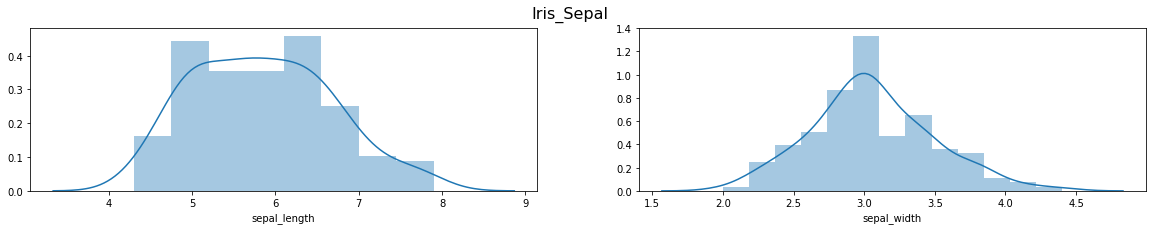

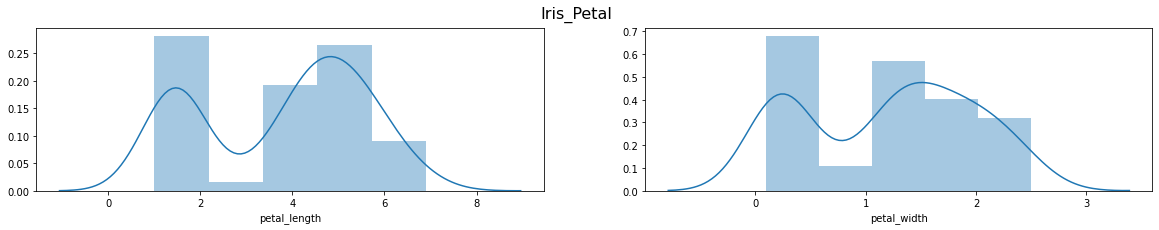

In [0]:
draw_dist(iris,['sepal_length','sepal_width'],'Iris_Sepal')
draw_dist(iris,['petal_length','petal_width'],'Iris_Petal')

In [0]:
# [Distribution] n continuous variable + target_variable

def create_layered_boxplot(df,features, target_feature, subtitle='layered boxplot', kind='count',figsize=(20,7)):
  n_charts = len(features)
  fig, axes = plt.subplots(ncols=n_charts,figsize=figsize)
  fig.suptitle(subtitle, fontsize=16)
  for i in range(n_charts):
    feature = features[i-1]
    sns.boxplot(x=target_feature,y=feature,data=df,ax=axes[i-1])
    df[feature].describe()

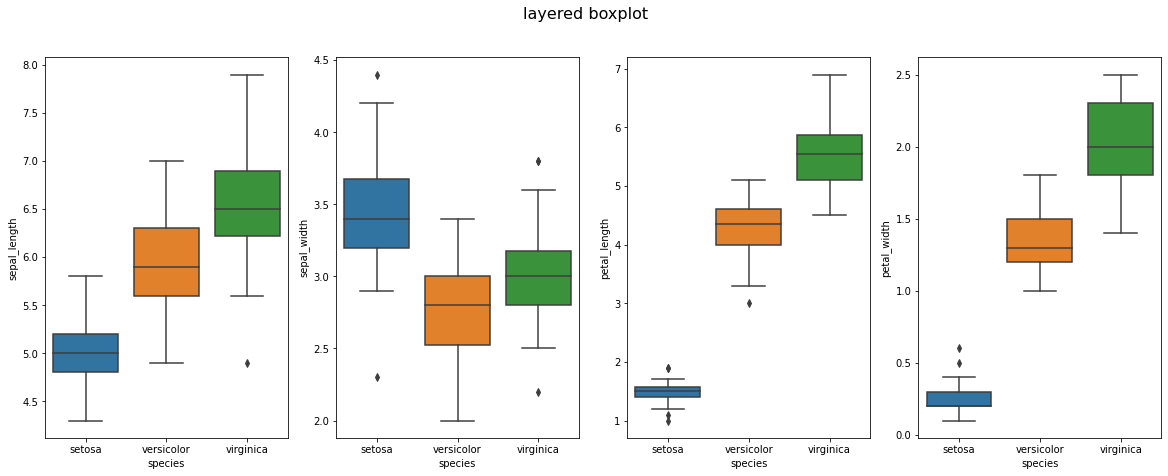

In [0]:
create_layered_boxplot(iris,['sepal_length','sepal_width','petal_length','petal_width'],'species')

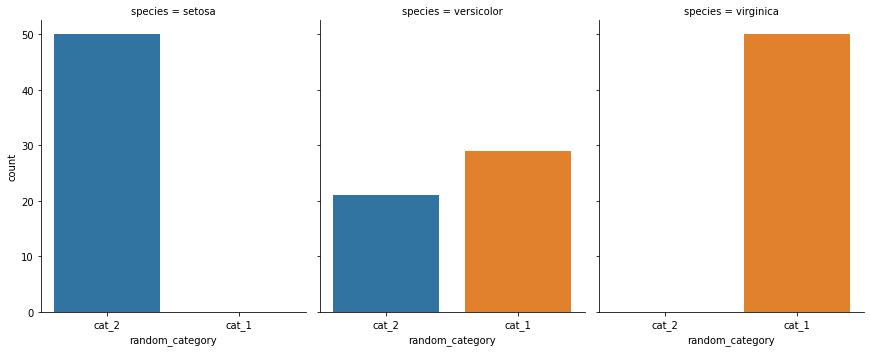

In [0]:
# [Distribution] 1 categorical variable + 1 continuous variable + target_variable

import pandas as pd
iris_mock = pd.DataFrame(iris)
iris_mock.loc[70:,'random_category']='cat_1' 
iris_mock.loc[:70,'random_category']='cat_2'

sns.factorplot(x='random_category',data=iris_mock,col='species',kind='count',aspect=.8,size=5)

# Data Feature to Feature Relationship Visualizations

In [0]:
# 2 continuous values + Correlations
def create_heatmap(df,figsize=(10,10)):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_title("Heatmap")

  sns.heatmap(corr,ax=ax, annot=True, linewidths=.5)

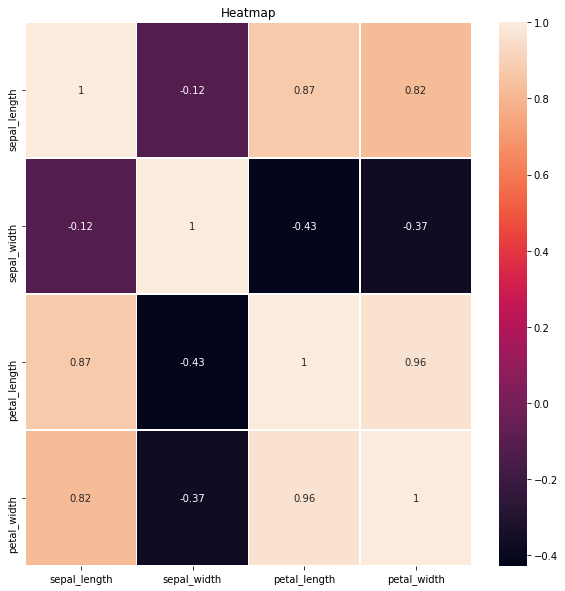

In [0]:
create_heatmap(iris,figsize=(10,10))

In [0]:
# 2 continuous values + target_variable distribution
def create_box_and_scatter_plot(df,feature_1,feature_2,target_feature,figsize=(10,5)):
  fig, ax =plt.subplots(1,2,figsize=figsize)
  sns.boxplot(x=target_feature, y= feature_1, data=df, ax=ax[0]).set_title(feature_1)
  sns.boxplot(x=target_feature, y= feature_2, data=df, ax=ax[1]).set_title(feature_2)
  fig2, ax2 =plt.subplots(1,1,figsize=figsize)
  sns.scatterplot(x=feature_1, y=feature_2, hue=target_feature, data=df, ax = ax2)

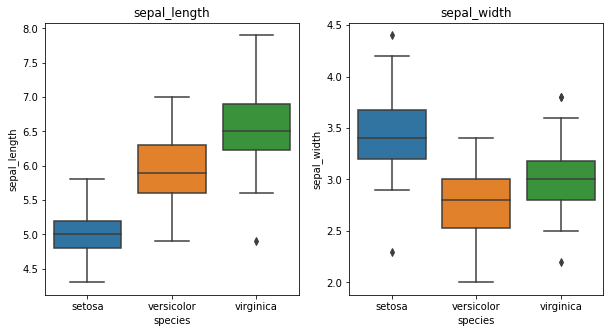

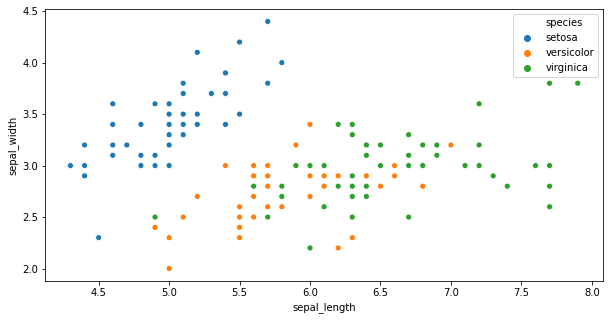

In [0]:
create_box_and_scatter_plot(iris,'sepal_length','sepal_width','species',figsize=(10,5))

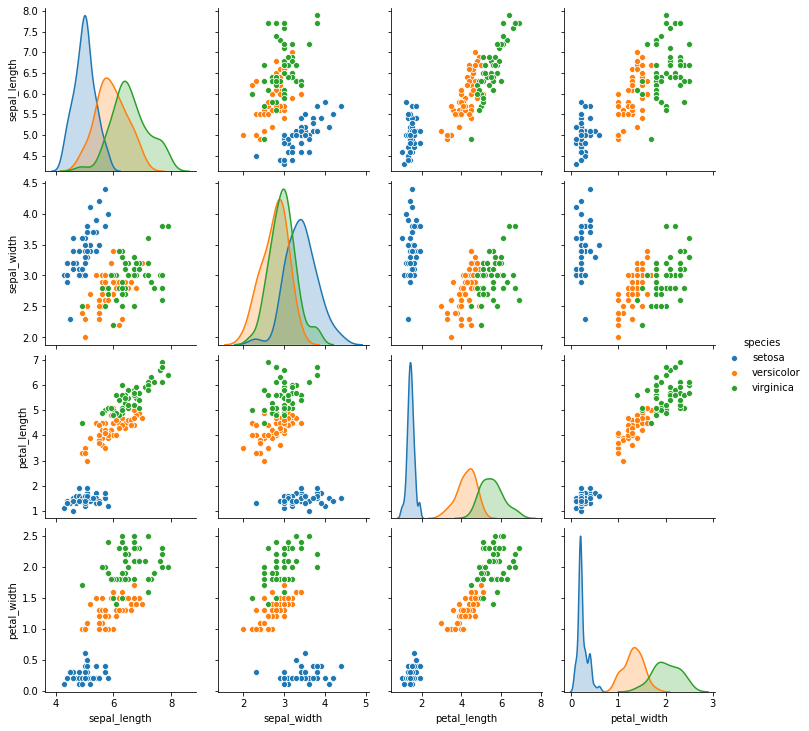

In [0]:
sns.pairplot(iris, hue="species")

# Let us apply it using HR Retention Dataset
For information and exploratory analysis that I did using Seaborn, please take a look into this.
https://towardsdatascience.com/whos-quitting-today-e1b0ca2fa90f

In [0]:
import pandas as pd
import requests
url='https://raw.githubusercontent.com/VincentTatan/PythonAnalytics/master/Youtube/dataset/HR_comma_sep.csv'
salary_df = pd.read_csv(url)

In [0]:
salary_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

0    11428
1     3571
Name: left, dtype: int64


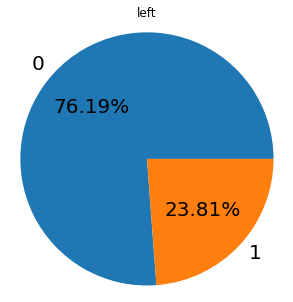

In [0]:
create_pie(salary_df,'left',figsize=(5,5))

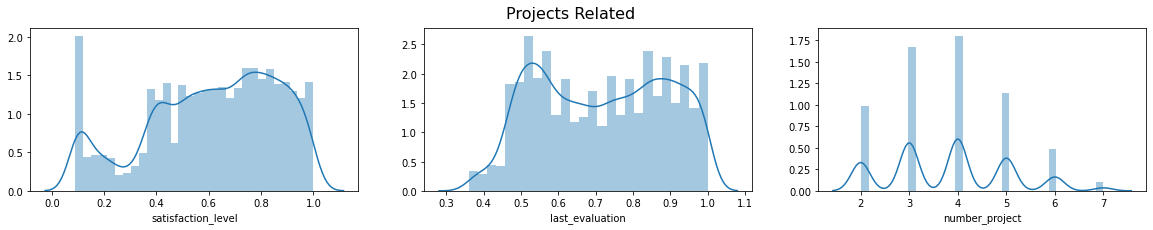

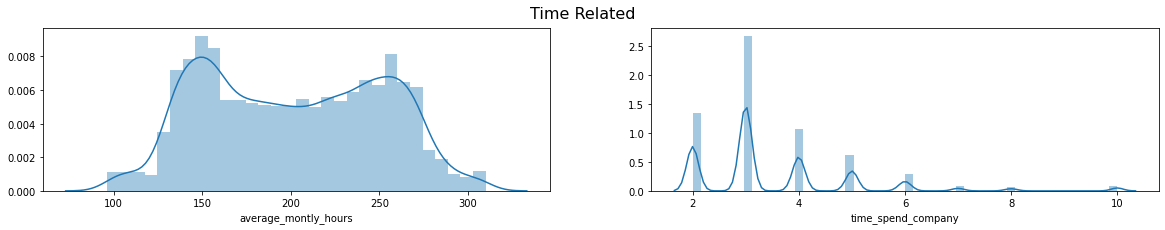

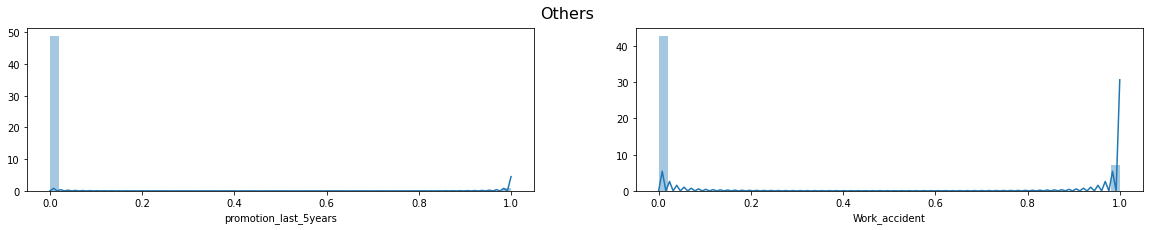

In [0]:
draw_dist(salary_df,['satisfaction_level', 'last_evaluation', 'number_project'],'Projects Related')
draw_dist(salary_df,['average_montly_hours', 'time_spend_company'],'Time Related')
draw_dist(salary_df,['promotion_last_5years', 'Work_accident'],'Others')

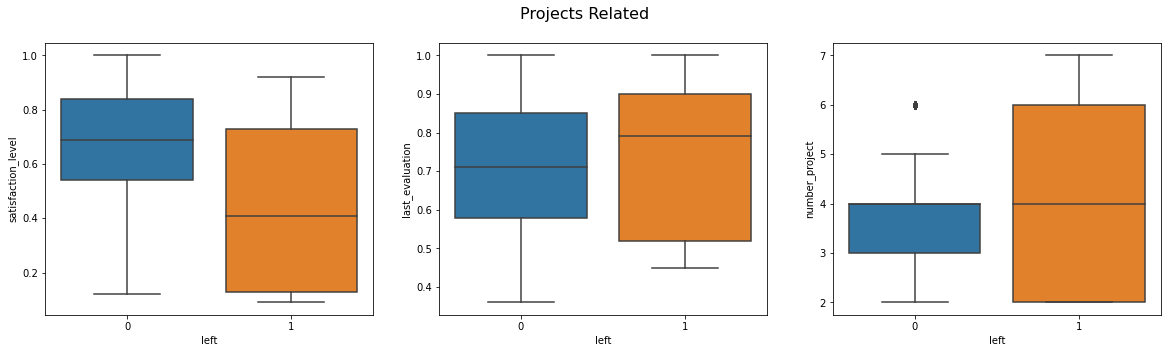

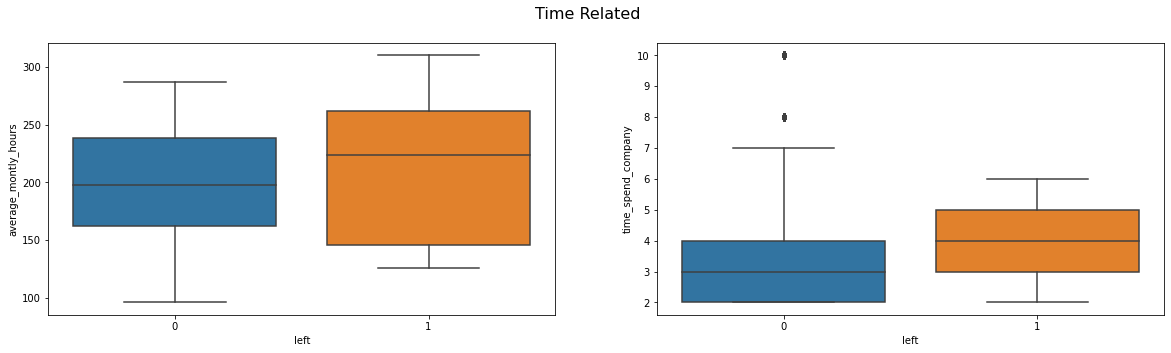

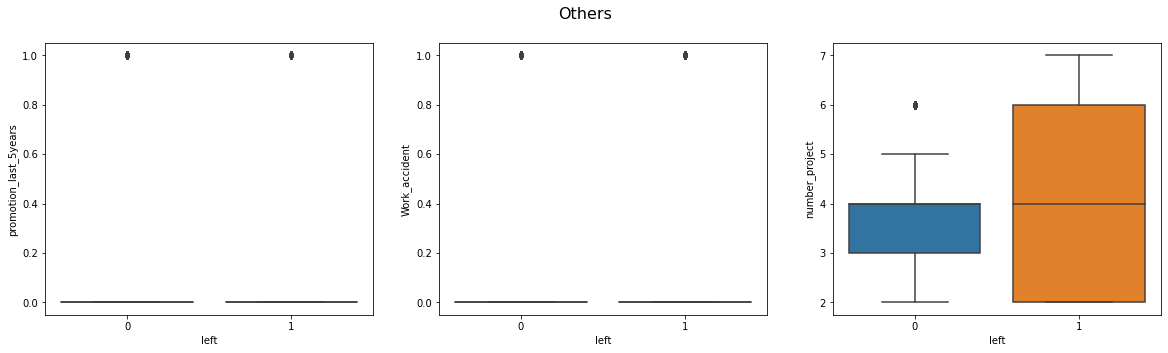

In [0]:
create_layered_boxplot(salary_df,['satisfaction_level', 'last_evaluation', 'number_project'],'left',subtitle='Projects Related',figsize=(20,5))
create_layered_boxplot(salary_df,['average_montly_hours', 'time_spend_company'],'left',subtitle='Time Related',figsize=(20,5))
create_layered_boxplot(salary_df,['promotion_last_5years', 'Work_accident', 'number_project'],'left',subtitle='Others',figsize=(20,5))


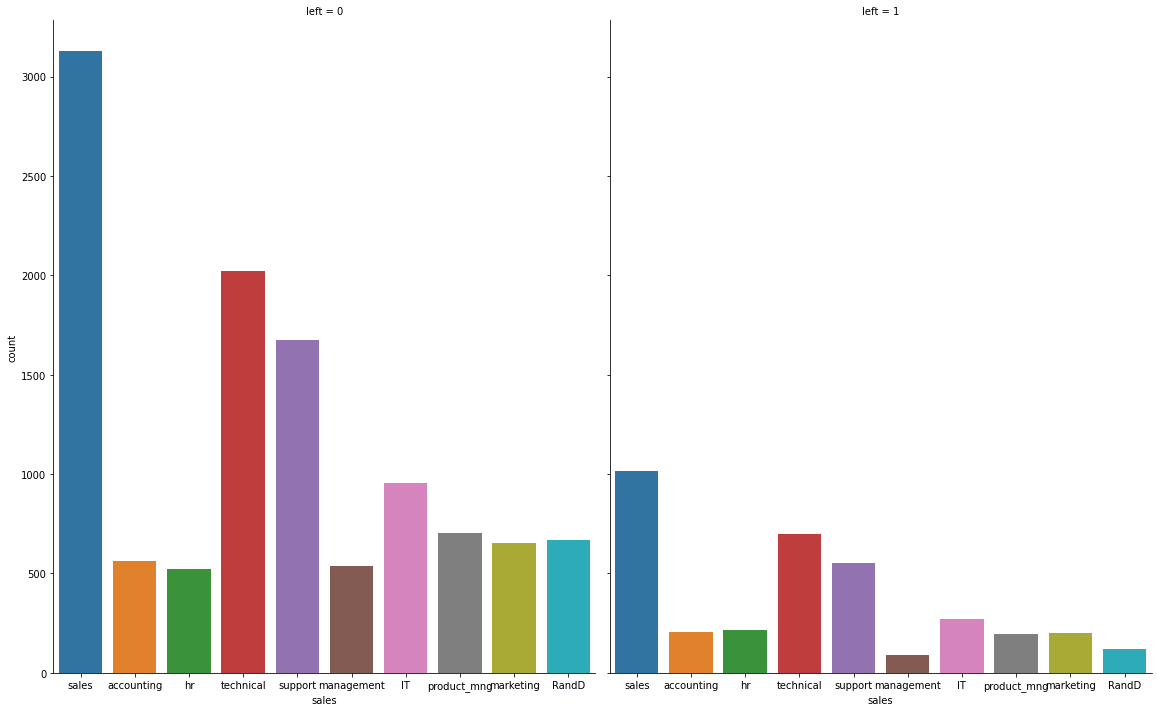

In [0]:
sns.factorplot(x='sales',data=salary_df,col='left',kind='count',aspect=.8,size=10)

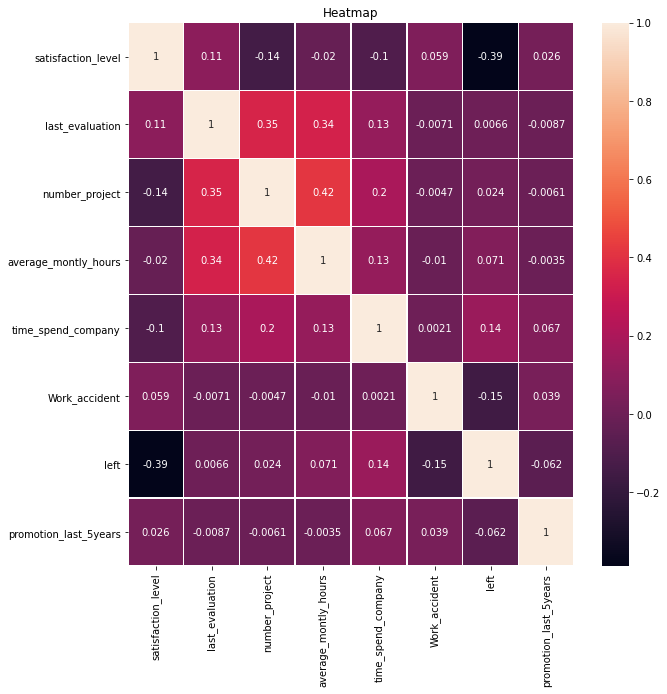

In [0]:
create_heatmap(salary_df,figsize=(10,10))

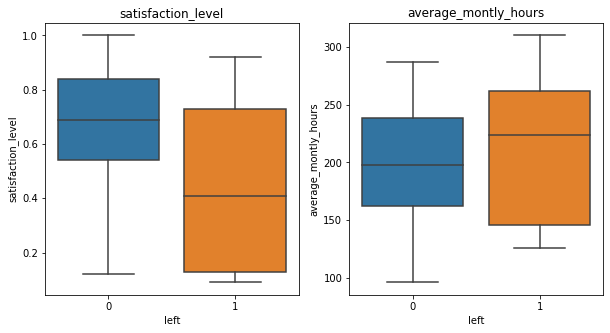

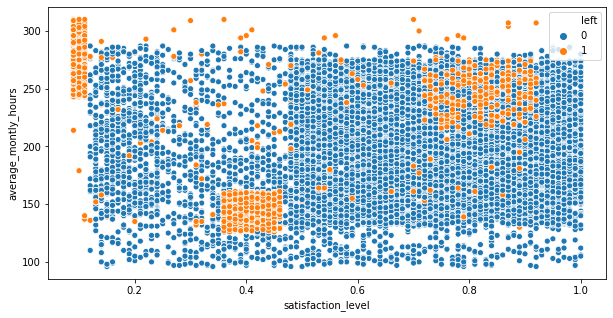

In [0]:
create_box_and_scatter_plot(salary_df,'satisfaction_level','average_montly_hours','left',figsize=(10,5))

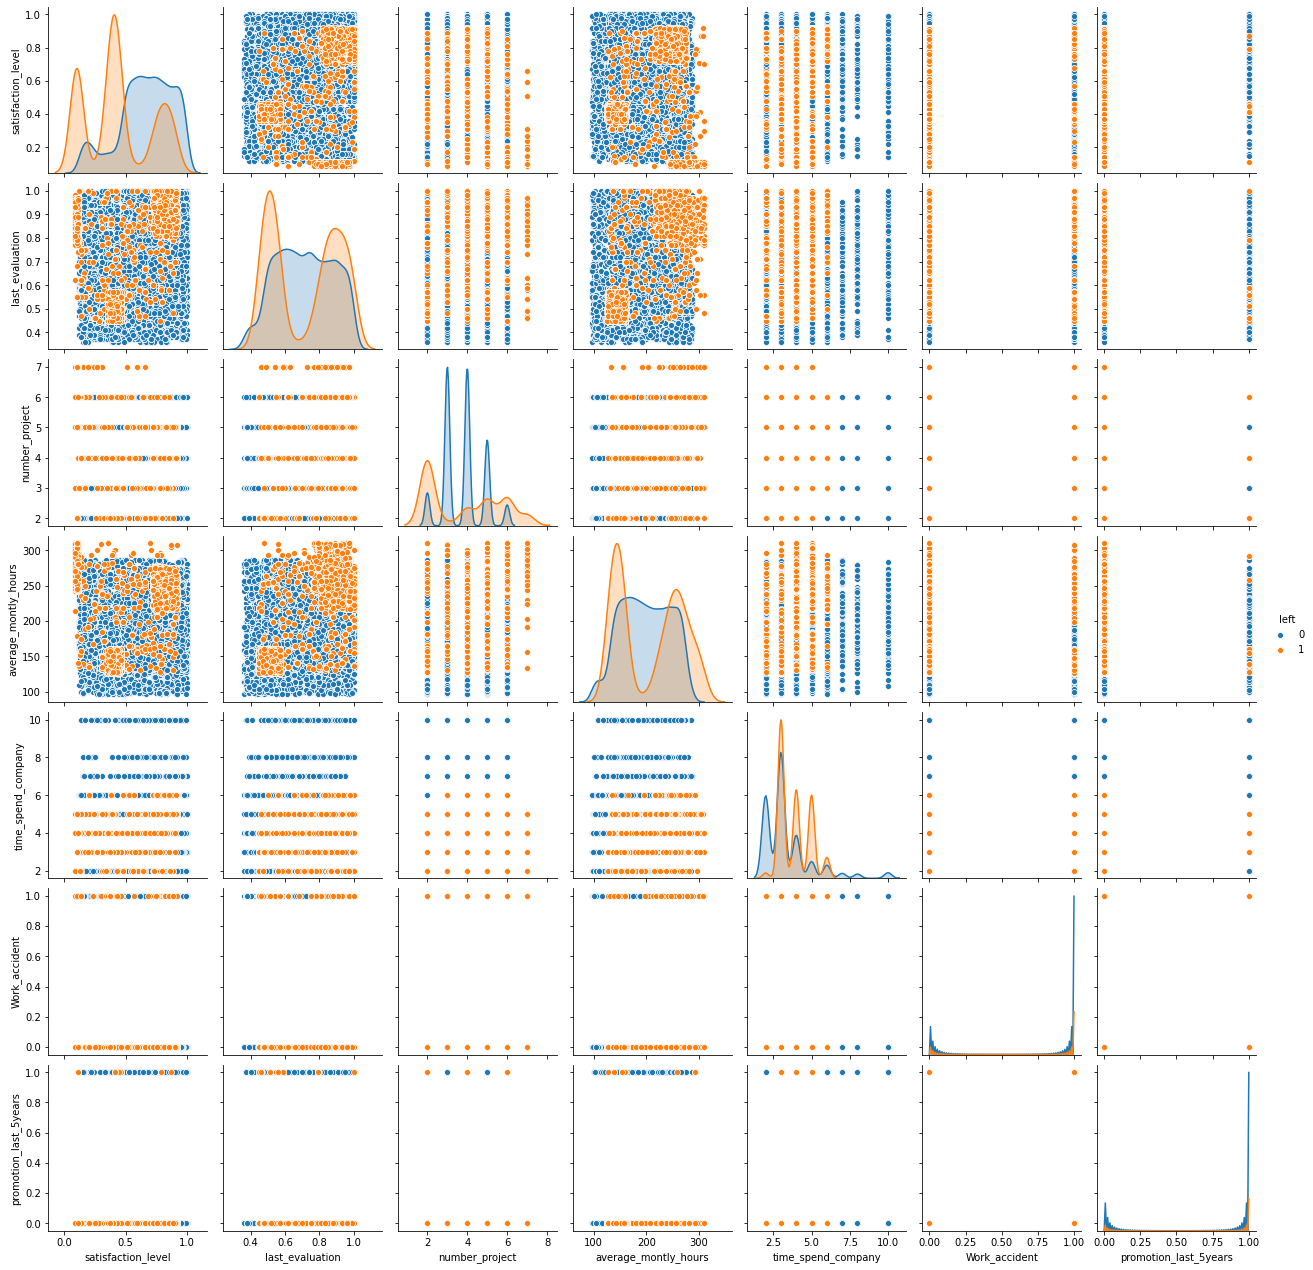

In [0]:
sns.pairplot(salary_df, hue="left")